# TP 1 Ciencia de datos
---------------

## Exploración Preliminar y Gráficos

In [175]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from random import randint
from scipy.stats import shapiro


In [133]:
data = pd.read_csv('tiempos.txt', delim_whitespace=True)

In [134]:
data

,Atleta,tiempo_sol,tiempo_nublado,tiempo_lluvia
0,1,11.1,11.3,19.4
1,2,13.0,12.8,18.2
2,3,16.1,16.0,19.0
3,4,14.5,14.1,18.9
4,5,12.0,12.5,19.1
5,6,11.0,11.6,18.7
6,7,15.1,14.6,189.0
7,8,14.4,14.2,19.9
8,9,16.1,16.1,18.5
9,10,17.0,16.7,19.2


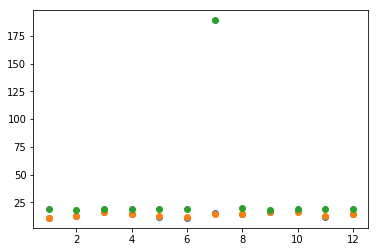

In [137]:
figure1 = plt.figure()
plot1 = plt.plot(data["Atleta"], data["tiempo_sol"],'o')
plot2 = plt.plot(data["Atleta"], data["tiempo_nublado"],'o')
plot3 = plt.plot(data["Atleta"], data["tiempo_lluvia"],'o')
figure1.show()


In [138]:
data.drop(6, inplace=True)

Hay un único outlier que claramente es un error de medición y dificulta el estudio del resto de los datos. Para que todo atleta tenga sus tiempos medidos tanto con lluvia como para los días de sol y nublados, borramos todas las mediciones del atleta con el outlier. 

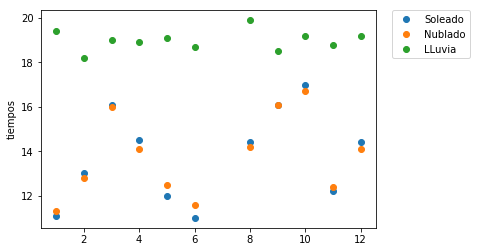

In [139]:
fontP = FontProperties()
figure1 = plt.figure()
plt.ylabel("tiempos")
plot1 = plt.plot(data["Atleta"], data["tiempo_sol"],'o', label="Soleado")
plot2 = plt.plot(data["Atleta"], data["tiempo_nublado"],'o', label="Nublado")
plot3 = plt.plot(data["Atleta"], data["tiempo_lluvia"],'o', label="LLuvia")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

figure1.show()

# Tests

### Primer test:

Vamos a hacer un test de permutaciones entre los tiempos de los días de sol y los de los días de lluvia. Tenemos como hipótesis nula H0 que el tiempo en días de lluvia es menor o igual al tiempo en días soleados.

Para no perder la individualidad de cada atleta, nuestras permutaciones son entre los tiempos de cada atleta.

Por ejemplo:

In [143]:
print "Original"
display(data[["Atleta", "tiempo_sol", "tiempo_lluvia"]])

print "Permutacion"
data_copy = data.copy()
data_copy["tiempo_sol"][2], data_copy["tiempo_lluvia"][2] = data_copy["tiempo_lluvia"][2], data_copy["tiempo_sol"][2]
data_copy["tiempo_sol"][4], data_copy["tiempo_lluvia"][4] = data_copy["tiempo_lluvia"][4], data_copy["tiempo_sol"][4]
data_copy["tiempo_sol"][7], data_copy["tiempo_lluvia"][7] = data_copy["tiempo_lluvia"][7], data_copy["tiempo_sol"][7]
data_copy["tiempo_sol"][8], data_copy["tiempo_lluvia"][8] = data_copy["tiempo_lluvia"][8], data_copy["tiempo_sol"][8]
data_copy["tiempo_sol"][11], data_copy["tiempo_lluvia"][11] = data_copy["tiempo_lluvia"][11], data_copy["tiempo_sol"][11]


display(data_copy[["Atleta", "tiempo_sol", "tiempo_lluvia"]])


Original


,Atleta,tiempo_sol,tiempo_lluvia
0,1,11.1,19.4
1,2,13.0,18.2
2,3,16.1,19.0
3,4,14.5,18.9
4,5,12.0,19.1
5,6,11.0,18.7
7,8,14.4,19.9
8,9,16.1,18.5
9,10,17.0,19.2
10,11,12.2,18.8


Permutacion


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Atleta,tiempo_sol,tiempo_lluvia
0,1,11.1,19.4
1,2,13.0,18.2
2,3,19.0,16.1
3,4,14.5,18.9
4,5,19.1,12.0
5,6,11.0,18.7
7,8,19.9,14.4
8,9,18.5,16.1
9,10,17.0,19.2
10,11,12.2,18.8


Nuestra diferencia de medias  5.19090909091
Cant mayor  3.0
Cant menor  2045.0
Proporcion mayor 0.00146484375


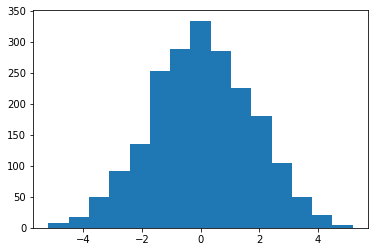

In [164]:
diff = data["tiempo_lluvia"].mean() - data["tiempo_sol"].mean()
print "Nuestra diferencia de medias ", diff

permutations = [ ]
for i in range(2**len(data["tiempo_lluvia"])):
    mean_lluvia = 0.0
    mean_soleado = 0.0   
    for j in range(len(data["tiempo_lluvia"])+1):
        if j != 6:
            if randint(0,1):
                mean_lluvia += data["tiempo_sol"][j]
                mean_soleado += data["tiempo_lluvia"][j]
            else:
                mean_soleado += data["tiempo_sol"][j]
                mean_lluvia += data["tiempo_lluvia"][j]
    mean_soleado /= len(data["tiempo_lluvia"])
    mean_lluvia /= len(data["tiempo_lluvia"])
    permutations.append(mean_lluvia - mean_soleado)

plt.hist(permutations,15)
cant_mayor = 0.0
cant_menor = 0.0
for permutation in permutations:
    if permutation >= diff:
        cant_mayor += 1
    else:
        cant_menor += 1
print "Cant mayor ", cant_mayor
print "Cant menor ", cant_menor
print "Proporcion mayor", cant_mayor/(cant_menor + cant_mayor)

Rechazamos la hipotesis nula porque el p-valor << 0.05, asi que podemos afirmar que el tiempo de dia soleado es menor que el de dia lluvioso.

### Segundo test:

Hacemos un t-test de muestras apareadas entre tiempo nublado y lluvioso. Para usar el t-test veamos primero que las variables estan normalmente distribuidas, tienen igual varianza y son independientes.

Para ver que son normalmente distribuidas usamos el test de Shapiro, que tiene como hipotesis nula que los valores se distribuyen 

In [188]:
print "pvalue para dias nublados: " ,shapiro(data["tiempo_nublado"])[1]
print "pvalue para dias lluviosos: " ,shapiro(data["tiempo_lluvia"])[1]
print ttest_rel(data["tiempo_nublado"], data["tiempo_lluvia"]).pvalue

pvalue para dias nublados:  0.377444773912
pvalue para dias lluviosos:  0.988315105438
3.77285476952e-06


Por lo tanto rechazamos la hipotesis nula.

# Tercer test:
    
Lo mismo entre tiempo soleado y nublado
        

In [10]:
print ttest_rel(data["tiempo_nublado"], data["tiempo_sol"]).pvalue

1.0


No podemos rechazar la hipotesis nula.

# Cuarto test:

Queremos ver la correlacion entre los tiempos de dias soleados y dias de lluvia

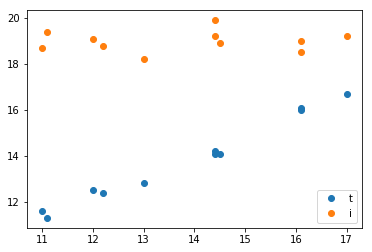

In [22]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
figure1 = plt.figure()
plot2 = plt.plot(data["tiempo_sol"], data["tiempo_nublado"],'o')
plot3 = plt.plot(data["tiempo_sol"], data["tiempo_lluvia"],'o')
plt.legend("title", prop = fontP)
figure1.show()

In [14]:
from scipy.stats import pearsonr
print pearsonr(data["tiempo_sol"], data["tiempo_lluvia"])

(0.064963553876733887, 0.84949358072453474)


# Quinto test:
 
Queremos ver la correlacion entre los tiempos en dias soleados vs los nublados.

In [34]:
from scipy.stats import pearsonr
print pearsonr(data["tiempo_sol"], data["tiempo_nublado"])

(0.99224199979513195, 1.8469595486418115e-09)
